# Machine Learning Engineer Nanodegree
## Capstone Project

In [17]:
# The code used in this project has been modified from the Supervised Learning Project (Finding Donors)


# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the fraud dataset
data = pd.read_csv("creditcard.csv")

# Success - Display the first record
display(data.head(n=1))

print "The data's shape is: {}".format(data.shape)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


The data's shape is: (284807, 31)


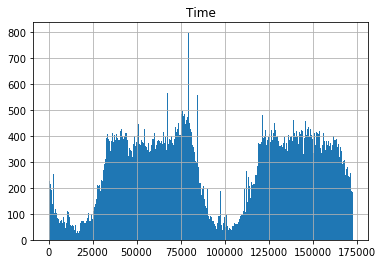

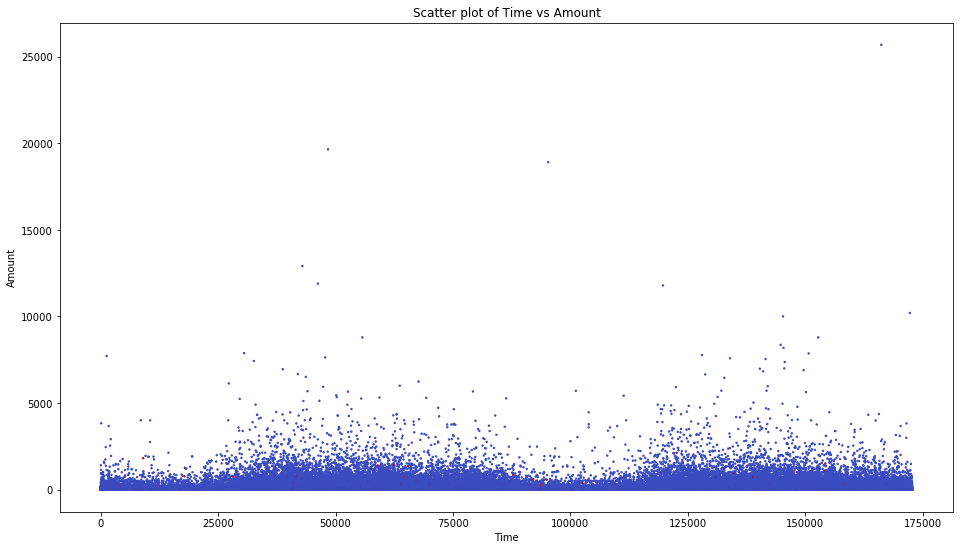

In [18]:
# Visualize the dataset

import matplotlib.pyplot as plt

#data.drop('Time', axis = 1).plot(kind='box')

data.hist(column = 'Time', bins = 1000)


data.plot(title='Scatter plot of Time vs Amount', kind ='scatter', x='Time', y='Amount', c='Class', s=2, legend=True, colormap='coolwarm', figsize=(16,9), colorbar=False)

In [19]:
# Split the features from the target class

# Total number of records
n_records = data.shape[0]

grouped = data.groupby(data['Class'])

# Number of records with fraud
n_fraud = len(grouped.get_group(1))

# Number of records without fraud
n_legit = len(grouped.get_group(0))

fraud_percent = (100.0 * n_fraud / (n_fraud + n_legit)) 

# Print the results
print "Total number of records: {}".format(n_records)
print "Number of fraudulent transactions: {}".format(n_fraud)
print "Number of legitament transactions: {}".format(n_legit)
print "Percentage of fraudulent transactions: {:.2f}%".format(fraud_percent)

Total number of records: 284807
Number of fraudulent transactions: 492
Number of legitament transactions: 284315
Percentage of fraudulent transactions: 0.17%


In [20]:
# Split the data into features and target label
fraud_raw = data['Class']
features_raw = data.drop('Class', axis = 1)

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
# Rescale features with large variability

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Time', 'Amount']
features_raw[numerical] = pd.DataFrame(scaler.fit_transform(data[numerical]))

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824


In [32]:
# Split the dataset into a training and testing set

# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, fraud_raw, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

#print y_train
fraud_in_train = y_train.sum()
fraud_in_test = y_test.sum()

print "Number of fraudulent transactions in training set: {}".format(fraud_in_train)
print "Number of fraudulent transactions in testing set: {}".format(fraud_in_test)


Training set has 227845 samples.
Testing set has 56962 samples.
Number of fraudulent transactions in training set: 391
Number of fraudulent transactions in testing set: 101


In [33]:
# Get measures of the performance of a baseline model

from sklearn.metrics import fbeta_score, accuracy_score, average_precision_score

# Calculate accuracy
accuracy = 1.0 * n_legit / (n_legit + n_fraud) # also known as precision

recall = 1.0 * 0 / (n_fraud + 0) # note: 0 false positives and 0 true positives since everything is clasified as negative 

# Calculate F-score with beta = 0.5
fscore = (1.0 + 0.25) * accuracy * recall / ((0.25 * accuracy) + recall)

naive_predictions = np.zeros(56962) # number of entrys in testing set


# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)
print "Average precision-recall score of naive predictor: {:.4f}".format(average_precision_score(y_test, naive_predictions))


Naive Predictor: [Accuracy score: 0.9983, F-score: 0.0000]
Average precision-recall score of naive predictor: 0.5009


In [34]:
# Train and test pipeline to be used for training the classifiers and testing their performance

from sklearn.metrics import fbeta_score, accuracy_score, average_precision_score, confusion_matrix

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train.head(sample_size), y_train.head(sample_size))
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set,
    # then get predictions on the first 3000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train.head(3000))
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute average precision on the first 3000 training samples
    results['acc_train'] = average_precision_score(y_train.head(3000), predictions_train)
        
    # Compute average precision on test set
    results['acc_test'] = average_precision_score(y_test, predictions_test)
    
    # Compute F-score on the the first 3000 training samples
    results['f_train'] = fbeta_score(y_train.head(3000), predictions_train, beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
   
    # Compute confusion matrix on the test set
    results['confusion_matrix'] = confusion_matrix(y_test, predictions_test)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

RandomForestClassifier trained on 2278 samples.
RandomForestClassifier trained on 22784 samples.
RandomForestClassifier trained on 227845 samples.
GaussianNB trained on 2278 samples.
GaussianNB trained on 22784 samples.
GaussianNB trained on 227845 samples.
KNeighborsClassifier trained on 2278 samples.
KNeighborsClassifier trained on 22784 samples.
KNeighborsClassifier trained on 227845 samples.


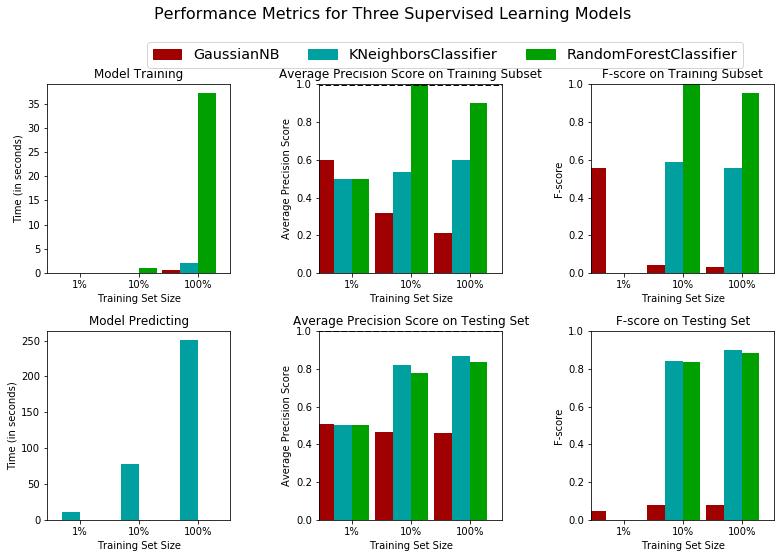

DecisionTreeClassifier trained on 2278 samples.
DecisionTreeClassifier trained on 22784 samples.
DecisionTreeClassifier trained on 227845 samples.
AdaBoostClassifier trained on 2278 samples.
AdaBoostClassifier trained on 22784 samples.
AdaBoostClassifier trained on 227845 samples.
SGDClassifier trained on 2278 samples.
SGDClassifier trained on 22784 samples.
SGDClassifier trained on 227845 samples.


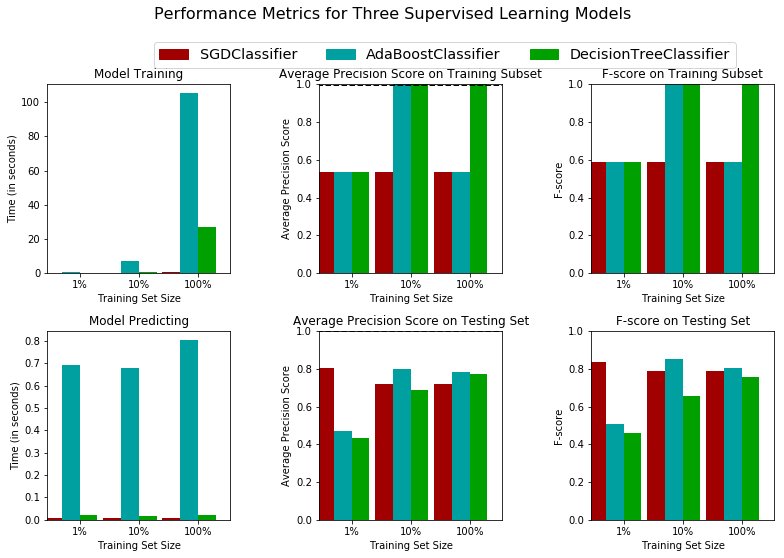

In [35]:
# Train and test 6 classifiers and compare the results

# Import the supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the six models
clf_A = RandomForestClassifier(random_state=0)
clf_B = GaussianNB()
clf_C = KNeighborsClassifier(n_neighbors=3)

clf_D = DecisionTreeClassifier(random_state=0)
clf_E = AdaBoostClassifier(random_state=0)
clf_F = SGDClassifier(loss="hinge", penalty="l2")

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = X_train.shape[0] / 100
samples_10 = X_train.shape[0] / 10
samples_100 = X_train.shape[0]

# Collect results on the learners will run two iterations of three learners each
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

# Collect results on remaining three learners
results = {}
for clf in [clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [36]:
# Tune the Random Forest Classifier parameters

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import ShuffleSplit


cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)


# Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# reate the parameters list you wish to tune
parameters = {'max_depth': [3,4,5,6,None], 'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2]}

# Make an fbeta_score scoring object
scorer = make_scorer(average_precision_score)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, cv=cv_sets)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "Confusion matrix:"
print confusion_matrix(y_test, predictions)
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Optimized parameters: " + str(grid_fit.best_params_)
print "Confusion matrix:"
print confusion_matrix(y_test, best_predictions)

Unoptimized model
------
Accuracy score on testing data: 0.9994
Average precision-recall score on testing data: 0.8345
F-score on testing data: 0.8824
Confusion matrix:
[[56855     6]
 [   26    75]]

Optimized Model
------
Final accuracy score on the testing data: 0.9995
Average precision-recall score on testing data: 0.8399
Final F-score on the testing data: 0.8858
Optimized parameters: {'min_samples_split': 4, 'max_depth': None, 'min_samples_leaf': 1}
Confusion matrix:
[[56855     6]
 [   25    76]]


#### Results:

|     Metric        | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------:    | :-----------------: | :---------------: | :-------------: | 
| Average Precision |        0.5007       |       0.8345      |     0.8399      |
| Accuracy Score    |        0.9983       |       0.9994      |     0.9995      |
| F-score           |        0.0000       |       0.8824      |     0.8858      |



[ 0.02532381  0.01660295  0.01713678  0.01186639  0.01504052  0.01366381
  0.00576872  0.01744827  0.00884999  0.02486703  0.08723048  0.09448943
  0.12726235  0.00988682  0.13654823  0.00718507  0.07352874  0.18379476
  0.01527883  0.00884005  0.00750007  0.01430263  0.01188989  0.00568209
  0.00691238  0.01187017  0.02210954  0.00465231  0.00409405  0.01037385]


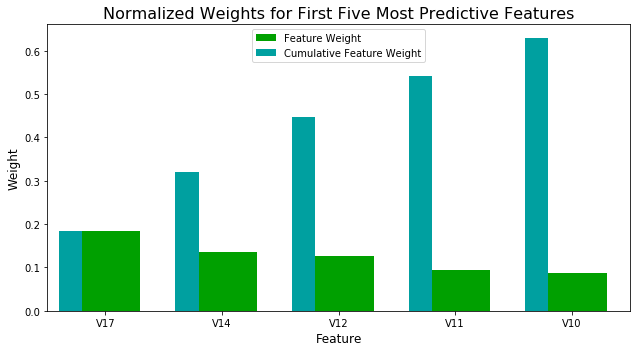

In [37]:
# Extract the feature importances
importances = best_clf.feature_importances_
print importances

# Plot
vs.feature_plot(importances, X_train, y_train)




In [38]:
# Train and test the model using only the 5 most predictive features

# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "Confusion matrix:"
print confusion_matrix(y_test, best_predictions)
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))
print "Confusion matrix:"
print confusion_matrix(y_test, reduced_predictions)

Final Model trained on full data
------
Accuracy on testing data: 0.9995
Average precision-recall score on testing data: 0.8399
F-score on testing data: 0.8858
Confusion matrix:
[[56855     6]
 [   25    76]]

Final Model trained on reduced data
------
Accuracy on testing data: 0.9995
Average precision-recall score on testing data: 0.8613
F-score on testing data: 0.8989
Confusion matrix:
[[56855     6]
 [   21    80]]


In [39]:
# Tune the model while using the reduced dataset

cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

# Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# Create the parameters list you wish to tune
parameters = {'max_depth': [4, 5, 6, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2]}

# Make an fbeta_score scoring object
scorer = make_scorer(average_precision_score)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, cv=cv_sets)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train_reduced, y_train)

# Get the estimator
best_reduced_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (best_clf.fit(X_train, y_train)).predict(X_test)
best_reduced_predictions = best_reduced_clf.predict(X_test_reduced)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "Confusion matrix:"
print confusion_matrix(y_test, predictions)
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_reduced_predictions))
print "Average precision-recall score on testing data: {:.4f}".format(average_precision_score(y_test, best_reduced_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_reduced_predictions, beta = 0.5))
print "Optimized parameters: " + str(grid_fit.best_params_)
print "Confusion matrix:"
print confusion_matrix(y_test, best_reduced_predictions)

Unoptimized model
------
Accuracy score on testing data: 0.9995
Average precision-recall score on testing data: 0.8399
F-score on testing data: 0.8858
Confusion matrix:
[[56855     6]
 [   25    76]]

Optimized Model
------
Final accuracy score on the testing data: 0.9995
Average precision-recall score on testing data: 0.8613
Final F-score on the testing data: 0.8989
Optimized parameters: {'min_samples_split': 2, 'max_depth': None, 'min_samples_leaf': 1}
Confusion matrix:
[[56855     6]
 [   21    80]]


Confusion matrix, without normalization
[[56855     6]
 [   21    80]]
Normalized confusion matrix
[[  9.99894480e-01   1.05520480e-04]
 [  2.07920792e-01   7.92079208e-01]]


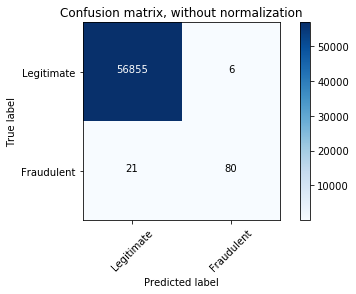

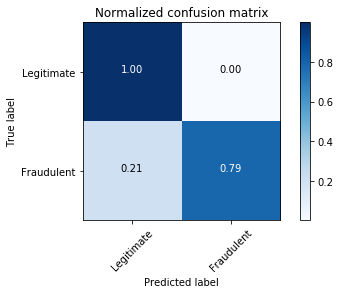

In [40]:
# Create visualizations of the confusion matrices

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, best_reduced_predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('Legitimate','Fraudulent'),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=('Legitimate','Fraudulent'), normalize=True,
                      title='Normalized confusion matrix')